In [ ]:
pip install numpy==2.0.2

In [ ]:
import pandas as pd
import pyreadstat
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

# Setting the random seed for reproducibility
np.random.seed(42)

df, meta = pyreadstat.read_sav('/Users/evonwong/Library/CloudStorage/OneDrive-TheEducationUniversityofHongKong/Evon/UKBB/Clustering/SDOH_UK_UKBB_ENGonly.sav')

# Displaying the first few rows of the dataframe
print(df.head())

# Optionally, inspect the metadata
print(meta.variable_value_labels)  # Shows value labels for categorical variables

         EID Date_Attend_Assess Date_Home_location_before_intake  \
0  1000016.0         2008-11-29                       1999-02-02   
1  1000029.0         2009-11-05                       1979-07-08   
2  1000033.0         2008-01-17                       1987-11-09   
3  1000045.0         2008-09-19                       2005-06-01   
4  1000051.0         2007-08-23                       1998-10-06   

   East_coordinate  North_coordinate  East_North_coordinate  \
0         430000.0          567000.0  POINT (430000 567000)   
1         343000.0          148000.0  POINT (343000 148000)   
2         387000.0          350000.0  POINT (387000 350000)   
3         357000.0          170000.0  POINT (357000 170000)   
4         449000.0          189000.0  POINT (449000 189000)   

  LSOA_Datazone_code_2011   LSOA_Datazone_name_2011 Datzone_name_2011  \
0               E01008574       North Tyneside 029C                     
1               E01029148            Sedgemoor 003C               

In [ ]:

# Selecting columns needed for analysis
columns_needed = ["EID",
"Census_High_Skill_Employment_rev",
"Census_Managers_Directors_Senior_Officials_rev",
"Census_Professional_rev",
"Census_Associate_Professional_rev",
"IMD_2010_Employmen",
"ONS_Net_Weekly_Income_rev",
"Census_Economically_Active_rev",
"Census_Economically_Inactive",
"IMD_2010_Income_IDACI",
"IMD_2010_Income_IDAOPI",
"Census_No_Adults_Employment",
#######SDOH_EDUCATION_DOMAIN##############
"Census_No_Qualification",
"IMD_2010_Children_Young_People",
"IMD_Skills",
"IMD_Not_Staying_on_in_Edu",
"IMD_Not_Enter_Higher_Edu",
########### SDOH_HEALTH_DOMAIN###############
"PHP_Winter_Mortality",
"Census_Comm_Estab",
"Census_Disability",
"IMD_Potential_Life_Lost",
"IMD_Comparative_Illness_Disability",
"IMD_Acute_Morbidity",
"IMD_Mood_Anxiety",
########### SDOH_NEIGHBORHOOD_BUILD_ENVIRONMENT#######
"Census_Avg_Household_Size",
"Census_No_Central_Heating",
"Census_Pop_Density",
"Census_No_Car_Vans",
"IMD_Air_quality",
"IMD_Traffic_Accident",
"IMD_NO2",
"IMD_PM",
"IMD_SO2",
"IMD_Benzene",
"Greenspace_1000m_rev",
"Natural_Enviro_1000m_rev",
"NO2_2010",
"PM10_2010",
"PM2.5_2010",
"IMD_Wider_Barriers",
"IMD_Geographical_Barriers",
"IMD_Affordability_indicator",
"IMD_Distance_GP_indicator",
"IMD_Distance_Food_Shop",
"IMD_Distance_Primary_School",
"IMD_Distance_Post_Office",
###############SDOH_SOCIAL_AND_COMMUNITY_CONTEXT###################
"PHP_Violent_Crime",
"IMD_2010_Crime_Disorder",
"Census_Ethnic_Groups",
"ONS_2010_population_18_p",
"ONS_2010_population_65_p",
"PHP_Smoking_Prevalence",
"Census_Limited_English_Proficiency",
"Census_Single",
"PHP_Suicide",
"PHP_Self_Harm"]

df = df[columns_needed]

# Exclude EID from the data used for clustering
df_for_clustering = df.drop(columns=['EID'])

In [ ]:
import pandas as pd
import pyreadstat
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Exclude EID from the data used for clustering
df_for_clustering = df.drop(columns=['EID'])

# Imputation using KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_for_clustering)

# Scaling the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Convert scaled data to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_for_clustering.columns)

# Clustering using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster results to the scaled dataframe
df_scaled['Cluster'] = clusters

# Optionally, you can add back the EID if necessary for identification
df_scaled['EID'] = df['EID'].values


# Save the DataFrame with scaled data and clusters
save_path = '/Users/evonwong/Downloads/20251008 all SDOH clustering sensitivity analysis scaled and clustered.sav'
pyreadstat.write_sav(df_scaled, save_path)

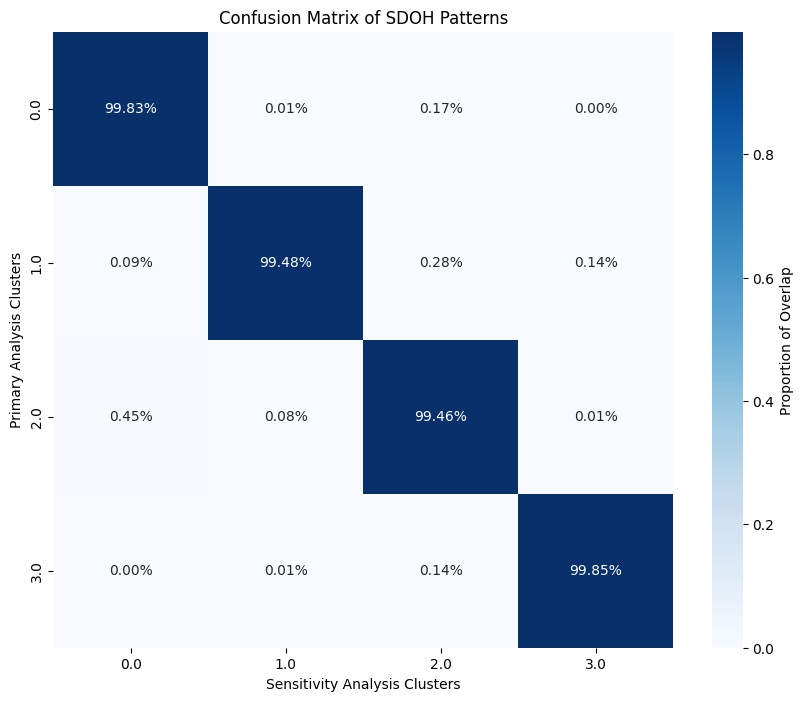

In [5]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the datasets
primary_path = '/Users/evonwong/Downloads/26 June UKBB_SDOH_kmeancluster_data_k4_updatedvariables.sav'
sensitivity_path = '/Users/evonwong/Library/CloudStorage/OneDrive-TheEducationUniversityofHongKong/Evon/UKBB/Clustering/Draft 1/Draft 1 revised/20251008 all SDOH clustering sensitivity analysis scaled and clustered.sav'

# Load the datasets
primary_df, primary_meta = pyreadstat.read_sav(primary_path)
sensitivity_df, sensitivity_meta = pyreadstat.read_sav(sensitivity_path)

# Assuming 'Cluster_k4_v2_recode' is the cluster variable for both datasets
# Ensure EID is set as the index if not already
primary_df.set_index('EID', inplace=True)
sensitivity_df.set_index('EID', inplace=True)

# Filter both dataframes to include only the cluster columns
primary_clusters = primary_df[['Cluster_k4_v2_recode']]
sensitivity_clusters = sensitivity_df[['Cluster_k4_v2_recode']]

# Merge the datasets on EID
comparison_df = primary_clusters.join(sensitivity_clusters, lsuffix='_primary', rsuffix='_sensitivity')

# Clean any NaN values that arise from non-overlapping EIDs
comparison_df.dropna(inplace=True)

# Create a confusion matrix
confusion_matrix = pd.crosstab(
    comparison_df['Cluster_k4_v2_recode_primary'],
    comparison_df['Cluster_k4_v2_recode_sensitivity'],
    normalize='index'  # Normalize by rows to show proportions
)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Proportion of Overlap'})
plt.title('Confusion Matrix of SDOH Patterns')
plt.xlabel('Sensitivity Analysis Clusters')
plt.ylabel('Primary Analysis Clusters')
# Save the plot as a high-resolution PDF file
plt.savefig('/Users/evonwong/Downloads/20251008Confusion_Matrix_SDOH_Patterns.pdf', dpi=1200, format='pdf')
plt.show()